# GeoParse text

First initialize the geoparser by giving the high and low area threshold in km2. 
Then you can parse a list of str and find the locations in the text. It returns the polygon, name and area of the spatial entities found. 

In [29]:
%load_ext autoreload
%autoreload 2

from geoparsing import OSMGeoParser, safe_join

# You can add a googlemapsAPIkey to enhance the results of the geoparser, see : 
geoparser = OSMGeoParser(10, 90000, googlemapsAPIkey=None)
gdf = geoparser.osm_research(['Zalana'],\
     how=None)

gdf

[nominatim] downloading data: search


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
France
╰── 20272
    ╰── France métropolitaine
        ╰── Corse
            ╰── Haute-Corse
                ╰── Corte
                    ╰── Zalana


,name,root,geometry,area_km,join_index
0,Zalana,France,"POLYGON ((9.35614 42.26694, 9.35624 42.26672, ...",13.215705,0


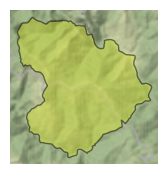

In [30]:
import contextily as cx
import matplotlib.pyplot as plt
# gdf.plot(column='name', legend=True, alpha=0.5)

df_wm = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(2,2))
df_wm.plot(ax=ax, alpha=0.5, edgecolor='k', color='#CDDC39')
ax.set_axis_off()
source = cx.providers.Esri.WorldShadedRelief
cx.add_basemap(ax, zoom=11, crs=df_wm.crs, attribution=False)

fig.savefig('ex.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches = 0)

# GeoParse DataFrame

In [17]:
import pandas as pd
dfde = pd.read_csv('/Users/arthurcalvi/Data/Disturbances_maps/DFDE_export.csv')
# dfde = dfde[ (dfde['end_year'] < 2021) & (dfde['start_year'] > 1986) & (dfde['estimated'] == 0)]
# dfde.sort_index(inplace=True)
# dfde.head(20)

The inputs needed are :
- Pandas DataFrame
- columns : a list of the names of the columns of the DataFrame on which to perform the geoparsing, ex : ['location', 'country']
- wrapper : a func to add preprocessing or condition to perform the geoparsing
- union : False (to be deprecated)
- root_in : if the location to find should be in a country, and that the country is mentionned in a column, then give the name of that column here. It will check if the location is in this country before returning the polygon

In [18]:
#Retrieve texts of all events + ponctuation removing 
def wrapper_safe_join(row, columns=list):
    if len(row.country.split(';')) < 4:
        return safe_join(row, columns=columns)
    else :
        return ''


country = 'france'
dfde_fr = dfde[ dfde.country.str.lower().str.contains(country) ]
print(dfde_fr.shape)

gdf = geoparser.from_dataframe(dfde_fr, columns=['notes'],\
     wrapper=wrapper_safe_join, how='intersection', root_in='country', enforce=['location'])

(1271, 22)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[nominatim] downloading data: search
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[nominatim] downloading data: search
[nominatim] downloading data: search
[nominatim] downloading data: search
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1271 out of 1271 | elapsed:  4.2min finished


conversion rate : 63.10%


In [13]:
gdf

,id,internal_id,parent_id,not_event,estimated,start_year,day,month,end_year,area,...,species,country,location,join_index,name,root,geometry,area_km,root_in,valid
0,1136,13063,NaN,0,0,1984,NaN,NaN,1984,14664.0,...,NaN,France,Republic of France(FR),11,"intersection: Midi-Pyrénées,Provence-Alpes-Côt...",France,"POLYGON ((1.79967 42.57324, -0.01598 42.68512,...",45601.878317,France,True
2,30369,2680,NaN,0,0,1984,NaN,NaN,1984,NaN,...,NaN,France,Vosges(FR),419,Vosges,France,"POLYGON ((5.39361 48.39177, 5.39367 48.39171, ...",5897.724787,France,True
5,60061,129,NaN,0,0,1984,8,2,1984,NaN,...,NaN,France,Republic of France(FR),750,Haute-Marne,France,"POLYGON ((4.62751 48.46717, 4.62751 48.46711, ...",6256.237523,France,True
6,60062,130,NaN,0,0,1984,8,2,1984,NaN,...,NaN,France,Champagne(FR),751,Champagne,France,"POLYGON ((-0.93659 45.82694, -0.93653 45.82680...",19.471105,France,True
7,60128,196,NaN,0,0,1984,11,7,1984,4000.0,...,NaN,France,Vosges(FR),753,Vosges,France,"POLYGON ((5.39361 48.39177, 5.39367 48.39171, ...",5897.724787,France,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,189735,780,NaN,1,0,2021,NaN,NaN,2021,NaN,...,NaN,France,Hesse(FR),119446,Hesse,France,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,France,True
1039,189772,817,NaN,1,0,2021,NaN,NaN,2021,NaN,...,NaN,France,Hesse(FR),119463,Hesse,France,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,France,True
1040,189800,845,NaN,1,0,2021,NaN,NaN,2021,NaN,...,Fagus sylvatica,France,Hesse(FR),119478,Hesse,France,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,France,True
1041,189837,882,NaN,1,0,2021,NaN,NaN,2021,NaN,...,Conifers,France,Hesse(FR),119506,Hesse,France,"POLYGON ((7.01344 48.69227, 7.01369 48.69207, ...",12.961734,France,True


In [6]:
df = gdf.groupby(['start_year', 'end_year', 'cause', 'name'])['notes'].apply(', '.join).reset_index()
df


,start_year,end_year,cause,name,notes
0,1984,1984,Fire,"intersection: Midi-Pyrénées,Auvergne-Rhône-Alp...",'Provence-Alpes-Côte d'Azur; Auvergne-Rhône-Al...
1,1984,1984,Wind,intersection: Bas-Rhin,"Blown over, Percentage of total wood blown ove..."
2,1984,1984,Wind,"intersection: Briey,Meurthe-et-Moselle",Briey
3,1984,1984,Wind,intersection: Champagne,All forests hit; but damage was modest
4,1984,1984,Wind,intersection: Gray,"Centre de Gray; For 50% destroyed, Centre de G..."
...,...,...,...,...,...
348,2021,2021,Thaumetopoea processionea,intersection: Hesse,Trend: no change
349,2021,2021,Tomicus piniperda;Tomicus minor,intersection: Hesse,Trend: no change
350,2021,2021,Viscum album,intersection: Hesse,Trend: increasing
351,2021,2021,Wind,intersection: Hesse,Trend: no change


In [4]:
df = gdf.groupby(['start_year', 'end_year', 'cause', 'name'])['notes'].apply(', '.join).reset_index()
df


,start_year,end_year,cause,name,notes
0,1984,1984,Fire,"intersection: Auvergne-Rhône-Alpes,Provence-Al...",'Provence-Alpes-Côte d'Azur; Auvergne-Rhône-Al...
1,1984,1984,Wind,intersection: Bagnoles-de-l'Orne-Normandie,"State forest, State forest"
2,1984,1984,Wind,intersection: Bas-Rhin,"Blown over, Percentage of total wood blown ove..."
3,1984,1984,Wind,intersection: Gray,"Centre de Gray; For 50% destroyed, Centre de G..."
4,1984,1984,Wind,"intersection: Gray,Soisy-sous-Montmorency","Centre de Gray; Totally destroyed, Centre de G..."
...,...,...,...,...,...
371,2021,2021,Thaumetopoea processionea,intersection: Hesse,Trend: no change
372,2021,2021,Tomicus piniperda;Tomicus minor,intersection: Hesse,Trend: no change
373,2021,2021,Viscum album,intersection: Hesse,Trend: increasing
374,2021,2021,Wind,intersection: Hesse,Trend: no change


# Apply other parsing and saving

In [19]:
from other_parser import parse_area, parse_date

In [27]:
import fiona
import os 
name = 'france_reg-int'

out_dir = '/Users/arthurcalvi/Data/Disturbances_maps/DFDE' 
columns = ['id', 'start_date', 'end_date', \
            'cause', 'area', 'species', 'notes', \
            'country', 'location', 'name', \
            'geometry', 'area_km', \
            'reference', 'reference_long']


# gdf['area'] = gdf.apply(parse_area, axis=1)
gdf[['start_date', 'end_date']] = gdf.apply(parse_date, axis=1, result_type='expand')
gdf.start_date = pd.to_datetime(gdf.start_date).apply(str)
gdf.end_date = pd.to_datetime(gdf.end_date).apply(str)

gdf[columns].to_crs('EPSG:4326').to_parquet(os.path.join(out_dir,'DFDE_1984_2021_EPSG4326_FR.parquet'))